## Importing Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import umap.umap_ as umap
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing and EDA

In [2]:
np.random.seed(42)

In [3]:
customers_df= pd.read_csv('Dataset/olist_customers_dataset.csv')
geolocation_df= pd.read_csv("Dataset/olist_geolocation_dataset.csv")
items_df= pd.read_csv('Dataset/olist_order_items_dataset.csv')
payments_df= pd.read_csv('Dataset/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('Dataset/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('Dataset/olist_orders_dataset.csv')
products_df= pd.read_csv('Dataset/olist_products_dataset.csv')
sellers_df= pd.read_csv('Dataset/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('Dataset/product_category_name_translation.csv')

In [4]:
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
category_translation_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [14]:
for i in datasets:
    i.info()
    print("-"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 

In [15]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [16]:
for i in datasets:
    print(i.isnull().sum())
    print("-"*50)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
--------------------------------------------------
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
--------------------------------------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
--------------------------------------------------
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
--------------------------------------------------
review_id                      0
order_id                       0
review_score                   0
review_comment_title     

**Clean and merge selected tables**

Orders: Filter for delivered orders and handle nulls

In [17]:
orders_df = orders_df[orders_df['order_status'] == 'delivered']
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

Fill nulls in delivery dates with estimated delivery date (conservative assumption)

In [18]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

Products: Handle nulls in category and dimensions

In [19]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

In [20]:
products_df = products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

Translate product categories

In [21]:
products_df = products_df.merge(category_translation_df, on='product_category_name', how='left')
products_df['product_category_name_english'] = products_df['product_category_name_english'].fillna('unknown')

**Merge datasets**

Merge items with products

In [22]:
items_products_df = items_df.merge(products_df[['product_id', 'product_category_name_english']], on='product_id', how='left')

Merge orders with customers

In [23]:
orders_customers_df = orders_df.merge(customers_df, on='customer_id', how='left')

Merge with payments, reviews, and items

In [161]:
orders_full_df = orders_customers_df.merge(payments_df, on='order_id', how='left')
orders_full_df = orders_full_df.merge(reviews_df[['order_id', 'review_score', 'review_comment_title', 'review_comment_message']], on='order_id', how='left')
orders_full_df = orders_full_df.merge(items_products_df[['order_id', 'price', 'freight_value', 'product_category_name_english']], on='order_id', how='left')

Final merged dataset:

In [162]:
print(orders_full_df.info())
print("Missing values in merged dataset:\n", orders_full_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115723 entries, 0 to 115722
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115723 non-null  object        
 1   customer_id                    115723 non-null  object        
 2   order_status                   115723 non-null  object        
 3   order_purchase_timestamp       115723 non-null  datetime64[ns]
 4   order_approved_at              115723 non-null  object        
 5   order_delivered_carrier_date   115723 non-null  object        
 6   order_delivered_customer_date  115723 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115723 non-null  object        
 8   customer_unique_id             115723 non-null  object        
 9   customer_zip_code_prefix       115723 non-null  int64         
 10  customer_city                  115723 non-null  object        
 11  

Handle missing values in the merged dataset

In [163]:
orders_full_df['payment_sequential'] = orders_full_df['payment_sequential'].fillna(0)
orders_full_df['payment_installments'] = orders_full_df['payment_installments'].fillna(0)
orders_full_df['payment_type'] = orders_full_df['payment_type'].fillna(orders_full_df['payment_type'].mode()[0])
orders_full_df['payment_value'] = orders_full_df['payment_value'].fillna(0)

In [164]:
orders_full_df['review_score'] = orders_full_df['review_score'].fillna(orders_full_df['review_score'].median())

In [165]:
orders_full_df['product_category_name_english'] = orders_full_df['product_category_name_english'].fillna('unknown')

In [166]:
orders_full_df['review_comment_title'] = orders_full_df['review_comment_title'].fillna('')
orders_full_df['review_comment_message'] = orders_full_df['review_comment_message'].fillna('')

In [167]:
print("Missing values:\n", orders_full_df.isnull().sum())

Missing values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_comment_title             0
review_comment_message           0
price                            0
freight_value                    0
product_category_name_english    0
dtype: int64


**Aggregate to customer-level**

In [168]:
customer_features = orders_full_df.groupby('customer_unique_id').agg({
    'payment_value': ['sum', 'mean'],
    'order_id': 'nunique',
    'review_score': 'mean',
    'price': 'sum',
    'freight_value': 'sum',
    'order_purchase_timestamp': ['min', 'max'],
    'customer_state': 'first',
    'product_category_name_english': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'payment_type': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'review_comment_title': lambda x: ' '.join(x.dropna()),
    'review_comment_message': lambda x: ' '.join(x.dropna())
}).reset_index()

Flatten column names

In [169]:
customer_features.columns = [
    'customer_unique_id', 'total_spend', 'avg_spend', 'order_frequency',
    'avg_review_score', 'total_price', 'total_freight', 'first_purchase',
    'last_purchase', 'customer_state', 'top_category', 'top_payment_type',
    'review_comment_title', 'review_comment_message'
]

**Feature Engineering**

Recency (days since last purchase)

In [172]:
customer_features['last_purchase'] = pd.to_datetime(customer_features['last_purchase'])
customer_features['recency'] = (pd.Timestamp('2025-05-15') - customer_features['last_purchase']).dt.days

Average delivery time

In [173]:
orders_full_df['delivery_time'] = (orders_full_df['order_delivered_customer_date'] - 
                                   orders_full_df['order_purchase_timestamp']).dt.days
delivery_time = orders_full_df.groupby('customer_unique_id')['delivery_time'].mean().reset_index()
customer_features = customer_features.merge(delivery_time, on='customer_unique_id', how='left')
customer_features['delivery_time'] = customer_features['delivery_time'].fillna(customer_features['delivery_time'].median())

Handle remaining nulls

In [174]:
customer_features['total_spend'] = customer_features['total_spend'].fillna(0)
customer_features['avg_spend'] = customer_features['avg_spend'].fillna(0)
customer_features['avg_review_score'] = customer_features['avg_review_score'].fillna(customer_features['avg_review_score'].median())
customer_features['total_price'] = customer_features['total_price'].fillna(0)
customer_features['total_freight'] = customer_features['total_freight'].fillna(0)

In [175]:
customer_features = customer_features.drop(columns=['first_purchase', 'last_purchase'])

In [176]:
customer_features.head(5)

,customer_unique_id,total_spend,avg_spend,order_frequency,avg_review_score,total_price,total_freight,customer_state,top_category,top_payment_type,review_comment_title,review_comment_message,spend_freq_interaction,recency,delivery_time
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,141.90,1,5.0,129.90,12.00,SP,bed_bath_table,credit_card,Super Recomendo,"Adorei a cortina, ficou linda na minha sala, e...",141.90,2561,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,27.19,1,4.0,18.90,8.29,SP,health_beauty,credit_card,,,27.19,2564,3.0
2,0000f46a3911fa3c0805444483337064,86.22,86.22,1,3.0,69.00,17.22,SC,stationery,credit_card,,,86.22,2987,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,43.62,1,4.0,25.99,17.63,PA,telephony,credit_card,,Bom vendedor,43.62,2771,20.0
4,0004aac84e0df4da2b147fca70cf8255,196.89,196.89,1,5.0,180.00,16.89,SP,telephony,credit_card,,,196.89,2738,13.0


In [177]:
print("Missing values in customer_features:\n", customer_features.isnull().sum())

Missing values in customer_features:
 customer_unique_id        0
total_spend               0
avg_spend                 0
order_frequency           0
avg_review_score          0
total_price               0
total_freight             0
customer_state            0
top_category              0
top_payment_type          0
review_comment_title      0
review_comment_message    0
spend_freq_interaction    0
recency                   0
delivery_time             0
dtype: int64


**Handle Outliers**

In [178]:
for col in ['total_spend', 'avg_spend', 'total_price', 'total_freight', 'delivery_time', 'recency']:
    cap = customer_features[col].quantile(0.99)
    customer_features[col] = np.where(customer_features[col] > cap, cap, customer_features[col])
    customer_features[col] = np.log1p(customer_features[col])

**Encode categorical variables**

In [179]:
top_states = customer_features['customer_state'].value_counts().head(5).index
customer_features['customer_state'] = customer_features['customer_state'].apply(lambda x: x if x in top_states else 'other')
top_categories = customer_features['top_category'].value_counts().head(5).index
customer_features['top_category'] = customer_features['top_category'].apply(lambda x: x if x in top_categories else 'other')
top_payments = customer_features['top_payment_type'].value_counts().head(3).index
customer_features['top_payment_type'] = customer_features['top_payment_type'].apply(lambda x: x if x in top_payments else 'other')

In [126]:
customer_features = pd.get_dummies(customer_features, columns=['customer_state', 'top_category', 'top_payment_type'], 
                                   prefix=['state', 'category', 'payment'])

**Perform EDA**

In [127]:
print("Statistical Summary of Numerical Features:\n")
customer_features[['total_spend', 'order_frequency', 'avg_review_score', 'recency', 'delivery_time']].describe()

Statistical Summary of Numerical Features:



,total_spend,order_frequency,avg_review_score,recency,delivery_time
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,4.808666,1.033420,4.159056,7.895018,2.369005
std,0.889725,0.209097,1.277958,0.055901,0.628709
min,0.000000,1.000000,1.000000,7.804251,0.000000
25%,4.171768,1.000000,4.000000,7.849714,1.945910
50%,4.737426,1.000000,5.000000,7.889459,2.397895
75%,5.316341,1.000000,5.000000,7.936303,2.772589
max,7.429684,15.000000,5.000000,8.014997,3.828641


Distribution of key numerical features

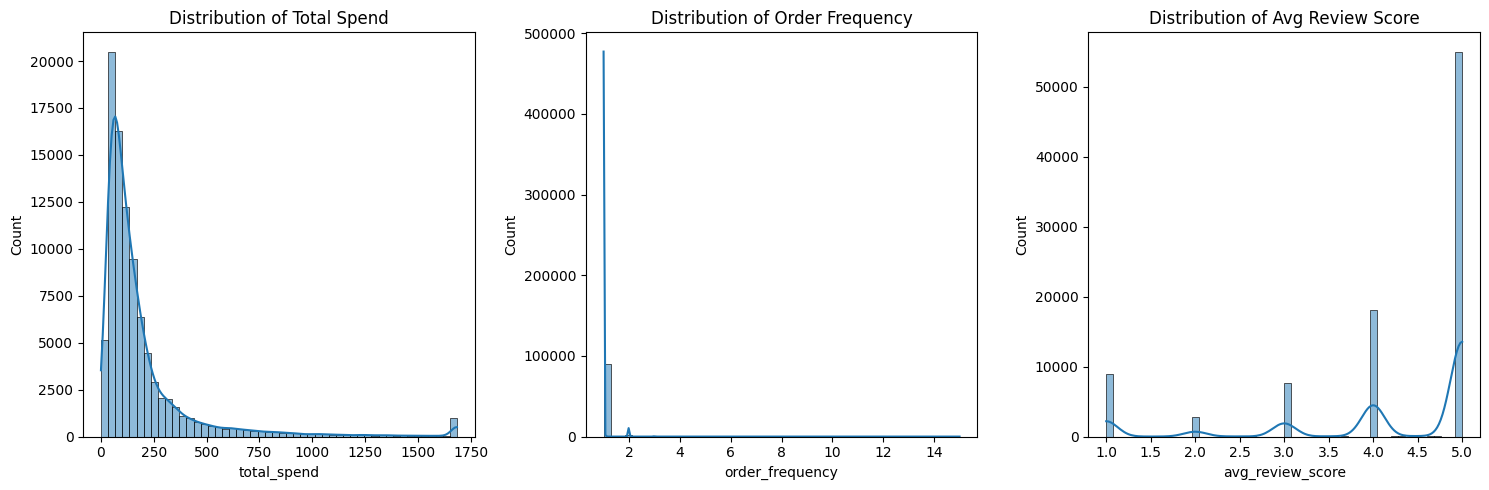

In [70]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(customer_features['total_spend'], bins=50, kde=True)
plt.title('Distribution of Total Spend')
plt.subplot(1, 3, 2)
sns.histplot(customer_features['order_frequency'], bins=50, kde=True)
plt.title('Distribution of Order Frequency')
plt.subplot(1, 3, 3)
sns.histplot(customer_features['avg_review_score'], bins=50, kde=True)
plt.title('Distribution of Avg Review Score')
plt.tight_layout()
plt.show()

Geographic distribution

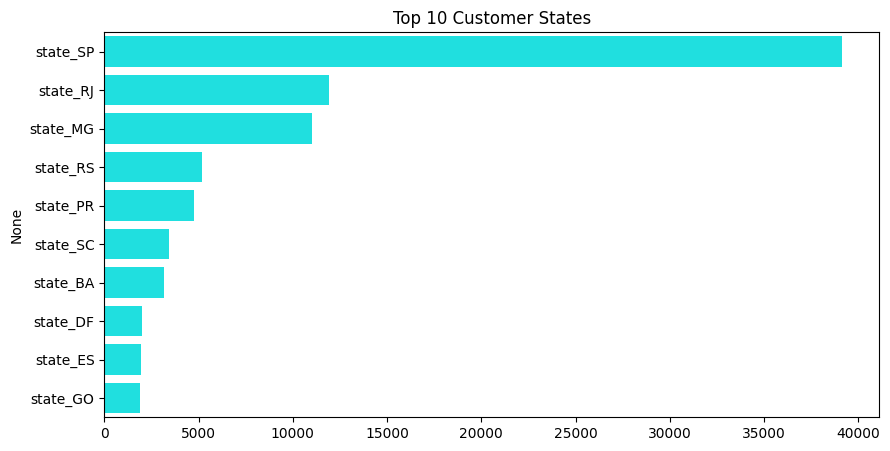

In [79]:
state_cols = [col for col in customer_features.columns if col.startswith('state_')]
state_counts = customer_features[state_cols].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=state_counts.values, y=state_counts.index, color='cyan')
plt.title('Top 10 Customer States')
plt.show()

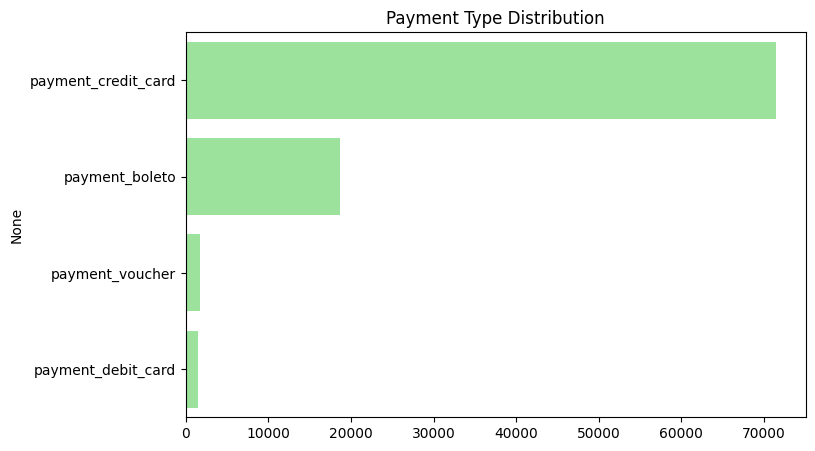

In [80]:
payment_cols = [col for col in customer_features.columns if col.startswith('payment_')]
payment_counts = customer_features[payment_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.values, y=payment_counts.index, color='lightgreen')
plt.title('Payment Type Distribution')
plt.show()

Box Plot of Delivery Time by Order Frequency

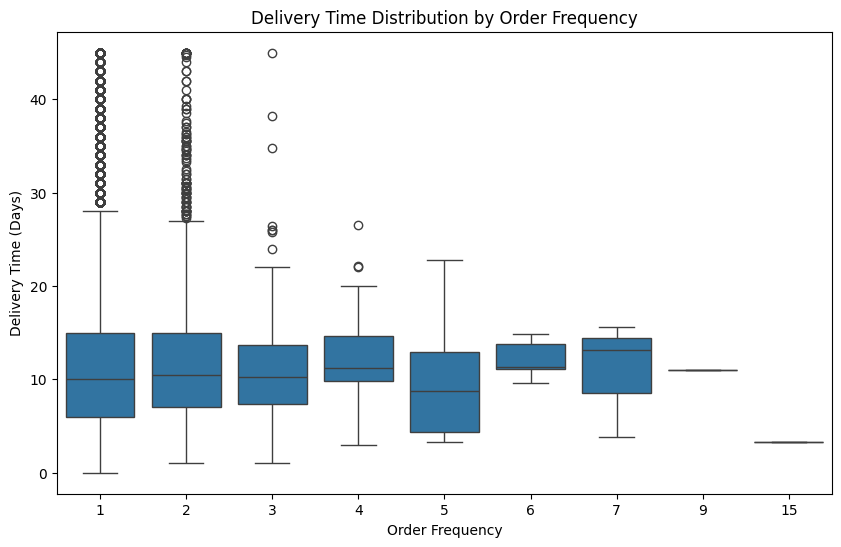

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_frequency', y='delivery_time', data=customer_features)
plt.title('Delivery Time Distribution by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Delivery Time (Days)')
plt.show()

Top 10 Product Categories Pie Chart

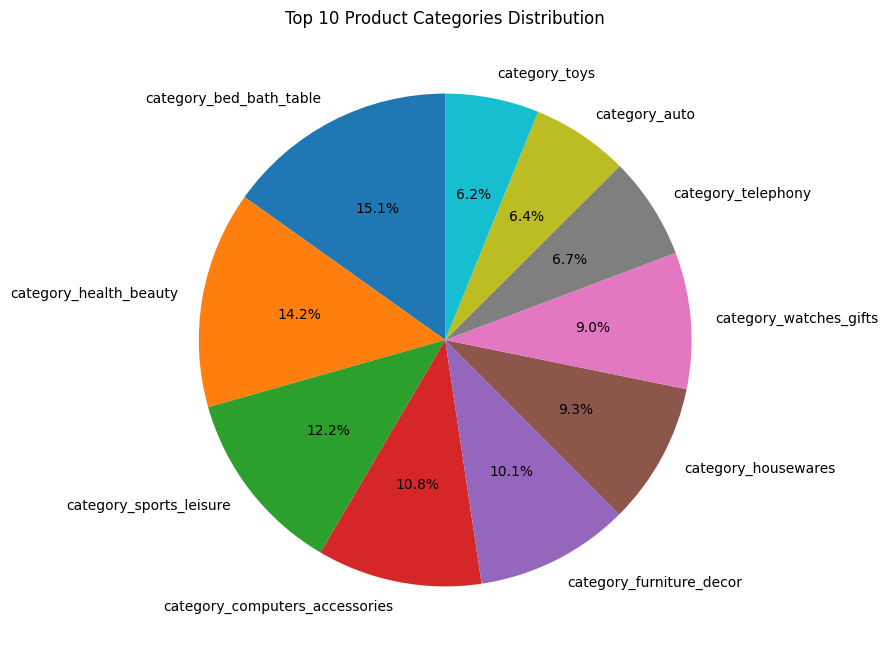

In [78]:
category_cols = [col for col in customer_features.columns if col.startswith('category_')]
category_counts = customer_features[category_cols].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Product Categories Distribution')
plt.show()

## Baseline Clustering

**Prepare data for clustering (Select features)**

In [142]:
# features = ['total_spend', 'avg_spend', 'order_frequency', 'avg_review_score', 
#             'recency', 'delivery_time']
# features += [col for col in customer_features.columns if col.startswith('state_')] 
# features += [col for col in customer_features.columns if col.startswith('category_')] 
# features += [col for col in customer_features.columns if col.startswith('payment_')]

features = ['total_spend', 'avg_spend', 'order_frequency', 'avg_review_score', 'recency', 'delivery_time']

In [143]:
X = customer_features[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Choose k using Elbow Method and Silhouette Scores

In [44]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [45]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

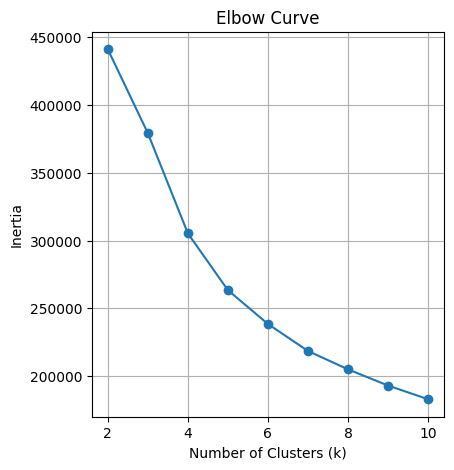

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

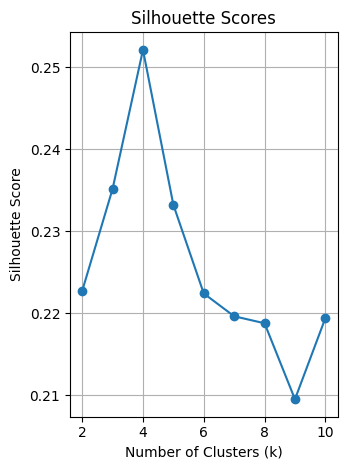

In [47]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
optimal_k = 4
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# customer_features['cluster'] = kmeans.fit_predict(X_scaled)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
customer_features['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

In [87]:
kmeans_silhouette = silhouette_score(X_scaled, customer_features['kmeans_cluster'])
kmeans_db_score = davies_bouldin_score(X_scaled, customer_features['kmeans_cluster'])
print("\nK-means Results:")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Davies-Bouldin Score: {kmeans_db_score:.3f}")


K-means Results:
Silhouette Score: 0.252
Davies-Bouldin Score: 1.216


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.sum()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_features['cluster'], palette='tab10')
plt.title(f'Clusters Visualized with PCA (Explained Variance: {explained_variance:.2%})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Model Variants & Dimensionality Reduction

**Clustering with DBSCAN and UMAP**

Apply UMAP for dimensionality reduction

In [ ]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

Apply DBSCAN on UMAP-reduced data

In [90]:
dbscan = DBSCAN(eps=0.4, min_samples=8)
customer_features['dbscan_cluster'] = dbscan.fit_predict(X_umap)

In [91]:
n_clusters_dbscan = len(set(customer_features['dbscan_cluster'])) - (1 if -1 in customer_features['dbscan_cluster'] else 0)
n_noise_dbscan = list(customer_features['dbscan_cluster']).count(-1)

In [92]:
print("\nDBSCAN Results:")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise_dbscan}")


DBSCAN Results:
Number of clusters: 11
Number of noise points: 0


In [ ]:
if n_clusters_dbscan > 1 and n_noise_dbscan < len(customer_features):
    dbscan_silhouette = silhouette_score(X_umap, customer_features['dbscan_cluster'])
    dbscan_db_score = davies_bouldin_score(X_umap, customer_features['dbscan_cluster'])
    print(f"Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"Davies-Bouldin Score: {dbscan_db_score:.3f}")
else:
    print("Cannot compute Silhouette and Davies-Bouldin Scores: too few clusters or too many noise points.")

Silhouette Score: 0.024
Davies-Bouldin Score: 0.809


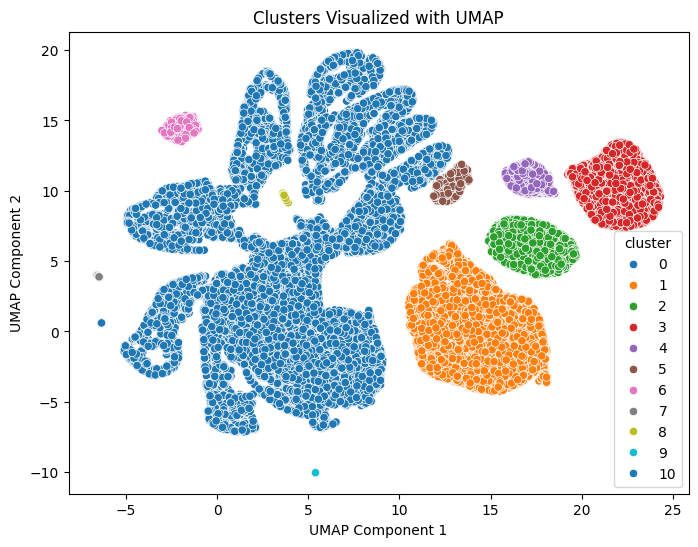

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=customer_features['dbscan_cluster'], palette='tab10')
plt.title('DBSCAN Clusters Visualized with UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

Hierarchical Clustering with Manhattan Distance and Ward Linkage

In [105]:
sample_size = 1000
sampled_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sampled = X_scaled[sampled_indices]
customer_features_sampled = customer_features.iloc[sampled_indices].copy()

In [106]:
hierarchical = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='average')
customer_features_sampled['hierarchical_cluster'] = hierarchical.fit_predict(X_sampled)

In [111]:
hierarchical_silhouette = silhouette_score(X_sampled, customer_features_sampled['hierarchical_cluster'], metric='manhattan')
hierarchical_db_score = davies_bouldin_score(X_sampled, customer_features_sampled['hierarchical_cluster'])
print("\nHierarchical Clustering Results (Sampled Dataset, n=1000, Manhattan, Average):")
print(f"Silhouette Score (Manhattan): {hierarchical_silhouette:.3f}")
print(f"Davies-Bouldin Score: {hierarchical_db_score:.3f}")


Hierarchical Clustering Results (Sampled Dataset, n=1000, Manhattan, Average):
Silhouette Score (Manhattan): 0.462
Davies-Bouldin Score: 0.514


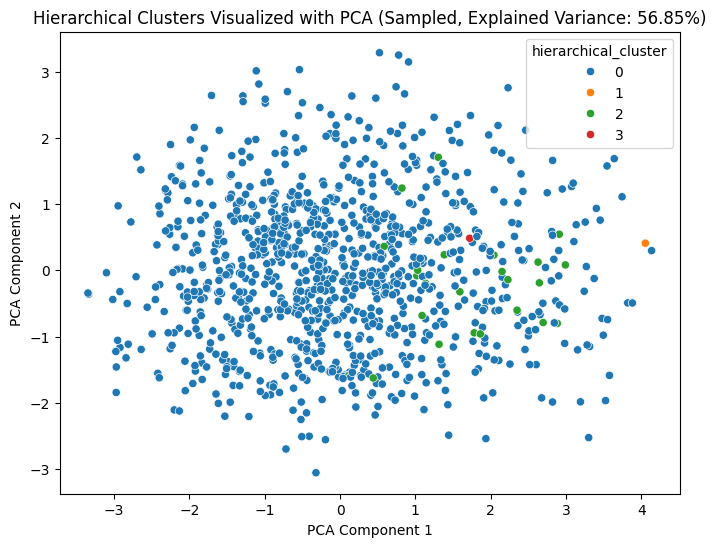

In [108]:
pca_viz_sampled = PCA(n_components=2)
X_pca_viz_sampled = pca_viz_sampled.fit_transform(X_sampled)
explained_variance_sampled = pca_viz_sampled.explained_variance_ratio_.sum()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_viz_sampled[:, 0], y=X_pca_viz_sampled[:, 1], hue=customer_features_sampled['hierarchical_cluster'], palette='tab10')
plt.title(f'Hierarchical Clusters Visualized with PCA (Sampled, Explained Variance: {explained_variance_sampled:.2%})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

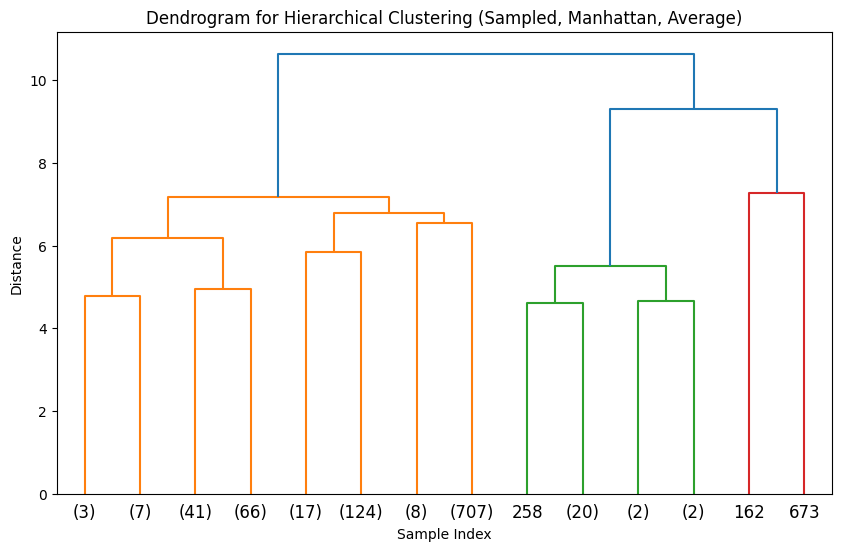

In [110]:
Z = linkage(X_sampled, method='average', metric='cityblock')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram for Hierarchical Clustering (Sampled, Manhattan, Average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Cluster Profiling & Business Insight

Reverse log transformation for interpretability

In [140]:
customer_features['total_spend_original'] = np.expm1(customer_features['total_spend'])
customer_features['avg_spend_original'] = np.expm1(customer_features['avg_spend'])
customer_features['recency_original'] = np.expm1(customer_features['recency'])
customer_features['delivery_time_original'] = np.expm1(customer_features['delivery_time'])

Compute key statistics for each cluster

In [146]:
cluster_stats = customer_features.groupby('kmeans_cluster').agg({
    'avg_spend_original': 'mean',
    'order_frequency': 'mean',
    'avg_review_score': 'mean',
    'recency_original': 'mean',
    'delivery_time_original': 'mean',
    'customer_state': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'top_category': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',
    'total_spend_original': 'mean'
}).reset_index()

Rename columns for clarity

In [148]:
cluster_stats.columns = [
    'Cluster', 'Avg Order Value (BRL)', 'Avg Order Frequency', 'Avg Review Score',
    'Avg Recency (Days)', 'Avg Delivery Time (Days)', 'Top Region', 'Top Category', 'Avg Total Spend (BRL)'
]

Round numerical values for readability

In [149]:
numerical_cols = ['Avg Order Value (BRL)', 'Avg Order Frequency', 'Avg Review Score', 
                  'Avg Recency (Days)', 'Avg Delivery Time (Days)', 'Avg Total Spend (BRL)']
cluster_stats[numerical_cols] = cluster_stats[numerical_cols].round(2)

In [150]:
print("\nCluster Profiling - Key Statistics:")
print(cluster_stats)


Cluster Profiling - Key Statistics:
   Cluster  Avg Order Value (BRL)  Avg Order Frequency  Avg Review Score  \
0        0                 259.40                 1.00              4.65   
1        1                  64.59                 1.00              4.61   
2        2                 145.20                 2.11              4.21   
3        3                 162.73                 1.00              1.60   

   Avg Recency (Days)  Avg Delivery Time (Days) Top Region    Top Category  \
0             2687.27                     11.81         SP   health_beauty   
1             2686.45                      9.48         SP   health_beauty   
2             2669.58                     11.81         SP  bed_bath_table   
3             2692.21                     19.78         SP  bed_bath_table   

   Avg Total Spend (BRL)  
0                 324.95  
1                  68.13  
2                 403.58  
3                 221.33  


Visualize key statistics

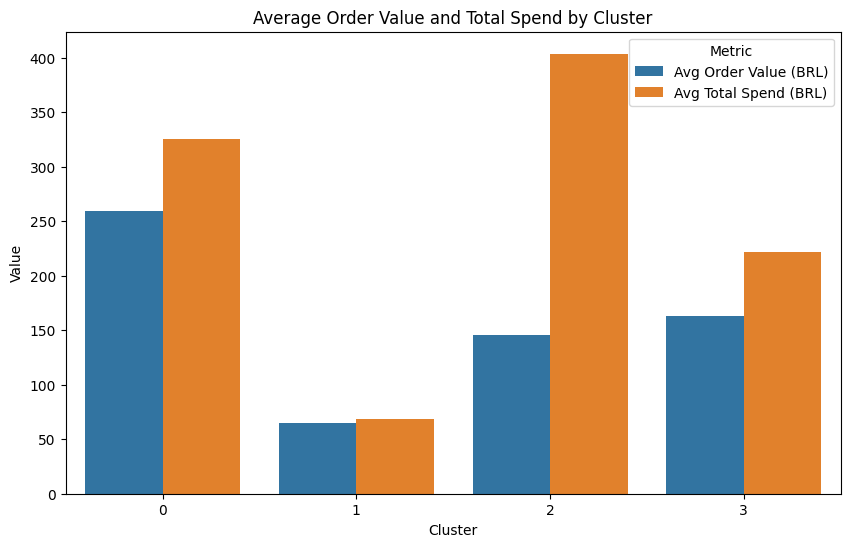

In [152]:
plt.figure(figsize=(10, 6))
cluster_stats_melted = pd.melt(cluster_stats, id_vars='Cluster', 
                               value_vars=['Avg Order Value (BRL)', 'Avg Total Spend (BRL)'],
                               var_name='Metric', value_name='Value')
sns.barplot(x='Cluster', y='Value', hue='Metric', data=cluster_stats_melted)
plt.title('Average Order Value and Total Spend by Cluster')
plt.show()

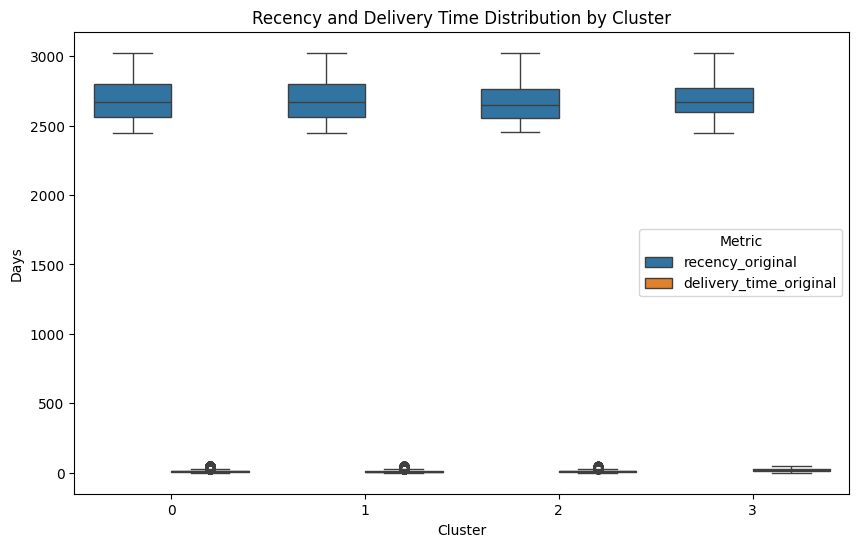

In [153]:
plt.figure(figsize=(10, 6))
customer_features_melted = pd.melt(customer_features, id_vars='kmeans_cluster',
                                   value_vars=['recency_original', 'delivery_time_original'],
                                   var_name='Metric', value_name='Value')
sns.boxplot(x='kmeans_cluster', y='Value', hue='Metric', data=customer_features_melted)
plt.title('Recency and Delivery Time Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Days')
plt.show()

## Model Enhancement through Feature Engineering

Interaction Term

In [170]:
customer_features['spend_freq_interaction'] = customer_features['total_spend'] * customer_features['order_frequency']

Temporal Behavior (Trend in Order Frequency)

In [180]:
customer_features['order_freq_trend'] = customer_features['order_frequency'] / (customer_features['recency'] + 1)

Review-Text Sentiment Scores

In [181]:
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 0.0
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

In [182]:
customer_features['sentiment_title'] = customer_features['review_comment_title'].apply(get_sentiment)
customer_features['sentiment_message'] = customer_features['review_comment_message'].apply(get_sentiment)
customer_features['avg_sentiment'] = (customer_features['sentiment_title'] + customer_features['sentiment_message']) / 2
customer_features['avg_sentiment'] = customer_features['avg_sentiment'].fillna(0)

In [183]:
enhanced_features = ['total_spend', 'avg_spend', 'order_frequency', 'avg_review_score', 
                    'recency', 'delivery_time', 'spend_freq_interaction', 
                    'order_freq_trend', 'avg_sentiment']

In [184]:
X_enhanced = customer_features[enhanced_features]
scaler = StandardScaler()
X_enhanced_scaled = scaler.fit_transform(X_enhanced)

In [185]:
kmeans_enhanced = KMeans(n_clusters=4, random_state=42, n_init=20)
customer_features['kmeans_enhanced_cluster'] = kmeans_enhanced.fit_predict(X_enhanced_scaled)

In [186]:
enhanced_silhouette = silhouette_score(X_enhanced_scaled, customer_features['kmeans_enhanced_cluster'])
enhanced_db_score = davies_bouldin_score(X_enhanced_scaled, customer_features['kmeans_enhanced_cluster'])
print("\nK-means Results (Enhanced Model):")
print(f"Silhouette Score: {enhanced_silhouette:.3f}")
print(f"Davies-Bouldin Score: {enhanced_db_score:.3f}")


K-means Results (Enhanced Model):
Silhouette Score: 0.242
Davies-Bouldin Score: 1.221


In [ ]:
original_silhouette = 0.252
original_db_score = 1.217 
print("\nComparison with Original Model:")
print(f"Original Silhouette Score: {original_silhouette:.3f}")
print(f"Enhanced Silhouette Score: {enhanced_silhouette:.3f}")
print(f"Original Davies-Bouldin Score: {original_db_score:.3f}")
print(f"Enhanced Davies-Bouldin Score: {enhanced_db_score:.3f}")


Comparison with Original Model:
Original Silhouette Score: 0.252
Enhanced Silhouette Score: 0.242
Original Davies-Bouldin Score: 1.217
Enhanced Davies-Bouldin Score: 1.221


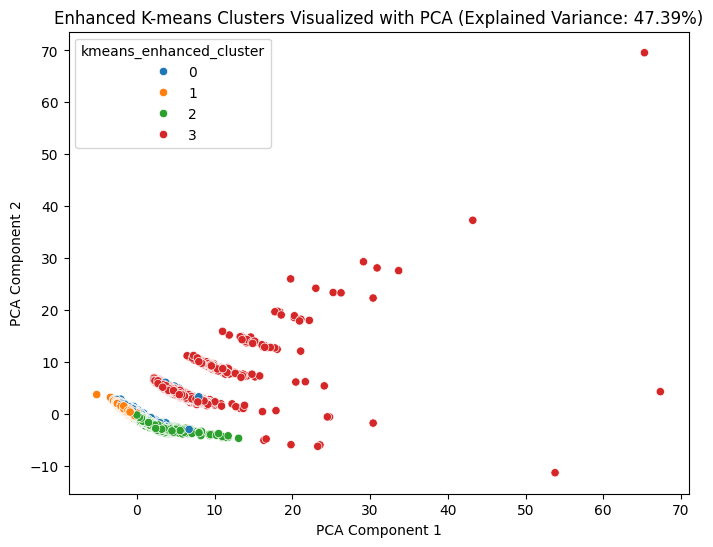

In [188]:
pca_viz_enhanced = PCA(n_components=2)
X_pca_viz_enhanced = pca_viz_enhanced.fit_transform(X_enhanced_scaled)
explained_variance_enhanced = pca_viz_enhanced.explained_variance_ratio_.sum()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_viz_enhanced[:, 0], y=X_pca_viz_enhanced[:, 1], 
                hue=customer_features['kmeans_enhanced_cluster'], palette='tab10')
plt.title(f'Enhanced K-means Clusters Visualized with PCA (Explained Variance: {explained_variance_enhanced:.2%})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()